In [1]:
! kaggle datasets download -d rohitsahoo/sales-forecasting

Dataset URL: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
License(s): GPL-2.0
100%|█████████████████████████████████████████| 480k/480k [00:01<00:00, 379kB/s]
100%|█████████████████████████████████████████| 480k/480k [00:01<00:00, 379kB/s]


In [2]:
! unzip sales-forecasting.zip

Archive:  sales-forecasting.zip
  inflating: train.csv               


In [4]:
import pandas as pd
import tensorflow as tf
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

2024-07-04 02:36:01.894398: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-04 02:36:02.649696: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
df = pd.read_csv('Train.csv')

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


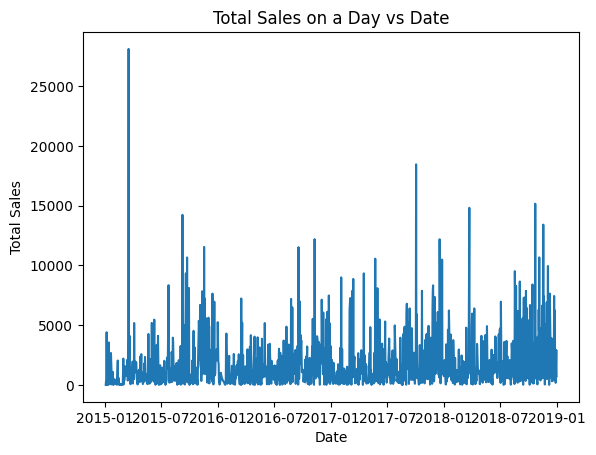

In [12]:
# Plot the sales vs order date

df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d/%m/%Y")
df.groupby(df['Order Date'].dt.date)['Sales'].sum().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales on a Day vs Date')
plt.show()

In [14]:
df_date_sales = df.groupby(df['Order Date'].dt.date)['Sales'].sum().reset_index()

In [19]:
df_date_sales.head()

,Order Date,Sales
0,2015-01-03,16.448
1,2015-01-04,288.060
2,2015-01-05,19.536
3,2015-01-06,4407.100
4,2015-01-07,87.158


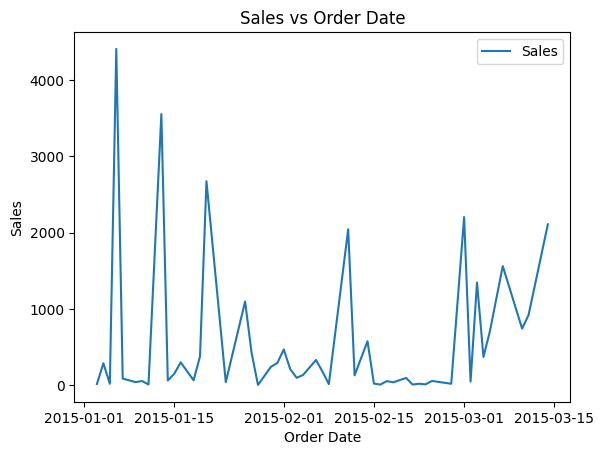

In [23]:
df_date_sales[:50].plot(x='Order Date', y='Sales', kind='line')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales vs Order Date')
plt.show()